In [2]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 8.1 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 KB 8.5 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

In [27]:
df_data_all = pd.read_csv("./KPIs.csv")

In [62]:
# Elimino las últimas tres columnas
df_data = df_data_all.iloc[ : , :-3]

In [262]:
# Convierto los nombres de las columnas en un arreglo
arr_columns = df_data.columns.to_numpy()
arr_columns

array(['CATEGORIA', 'TEMA', 'DATO BUSCADO', '¿Se tiene?', 'ORIGEN',
       'Campo agregado', 'Nombre del campo'], dtype=object)

# FILTRACIÓN POR LA COLUMNA CATEGORIA

In [168]:
#Obtengo todas las categorias que existen
categories = df_data['CATEGORIA'].unique()
categories

array(['Cap 1000', 'Energía eléctrica', 'Suministro de Agua',
       'Servicios Profesionales', 'Viáticos', 'Orden social', 'Inmuebles',
       'Papeleria', 'Alimentos', 'TI'], dtype=object)

In [202]:
#Trabajo unicamente con la categoria de la posicion 3
category = categories[3]

## TEMA

In [263]:
#Creo una función que me regresa todos los tema de una categoria
def temas(category):
    """
    Está función es para obtener todos los temas en forma de un arreglo que contenga la categoria enviada en el parametro.
    """
    df_data[df_data['CATEGORIA'] == category]
    arr_tema = df_data[df_data['CATEGORIA'] == category]['TEMA'].unique()
    return arr_tema

In [264]:
arr=temas(category)
print(arr)

['Contratos']


In [266]:
tema = arr[0]
tema

'Contratos'

# Datos

In [270]:
def data(category, tema):
    data_total = df_data['¿Se tiene?'].loc[(df_data['CATEGORIA'] == category) & (df_data['TEMA'] == tema)].size
    data_without_information = df_data['Campo agregado'].loc[(df_data['CATEGORIA'] == category) & (df_data['TEMA'] == tema) & (df_data['¿Se tiene?'] == 'No')].count()
    data_information = data_total - data_without_information
    return data_total, data_without_information, data_information


In [271]:
data(category,tema)


(11, 10, 1)

# FUENTE DE INFORMACIÓN

In [275]:
def source_information(category):
    """
    Esta función es para obtener la fuente de información de todos los temas que tiene la categoria.
    """
    source_information = df_data['ORIGEN'].loc[(df_data['CATEGORIA'] == category)].unique()
    return source_information

# Prueba de todo el código anterior

In [276]:
dashboard = {
        "Categoria": "",
        "Tema": [],
        "Datos": [],
        "Datos_con_informacion": [],
        "Datos_sin_informacion": [],
        "Source_information": ""
    }
df_data_all = pd.read_csv("./KPIs.csv")
        # Elimino las últimas tres columnas
df_data = df_data_all.iloc[ : , :-3]
        #Todas las Categorias
categories = df_data['CATEGORIA'].unique()
print(categories)

category = categories[1]
arr_datos, arr_without_data, arr_with_data = 0,0,0

dashboard['Categoria'] = category
theme = temas(category)

dashboard['Tema'] = theme
for j in range(theme.size):
    dashboard['Datos'].append(data(category, theme[j])[0])
    dashboard['Datos_sin_informacion'].append(data(category, theme[j])[1])
    dashboard['Datos_con_informacion'].append(data(category, theme[j])[2])
dashboard['Source_information'] = source_information(category)

print(dashboard)

['Cap 1000' 'Energía eléctrica' 'Suministro de Agua'
 'Servicios Profesionales' 'Viáticos' 'Orden social' 'Inmuebles'
 'Papeleria' 'Alimentos' 'TI']
{'Categoria': 'Energía eléctrica', 'Tema': array(['Watss consumidos', 'Insumos eléctricos',
       'Mantenimiento de aires acondicionado'], dtype=object), 'Datos': [7, 2, 2], 'Datos_con_informacion': [7, 2, 2], 'Datos_sin_informacion': [0, 0, 0], 'Source_information': array(['Facturas', 'Inventario'], dtype=object)}


In [277]:
print(dashboard)

{'Categoria': 'Energía eléctrica', 'Tema': array(['Watss consumidos', 'Insumos eléctricos',
       'Mantenimiento de aires acondicionado'], dtype=object), 'Datos': [7, 2, 2], 'Datos_con_informacion': [7, 2, 2], 'Datos_sin_informacion': [0, 0, 0], 'Source_information': array(['Facturas', 'Inventario'], dtype=object)}


## Gráficación


In [225]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:000m eta 0:00:01:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 KB 5.8 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 8.6 MB/s eta 0:00:000m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 7.5 MB/s eta 0:00:00m eta 0:00:010:00:01m
Note: you may need to restart the kernel to use updated packages.


In [227]:
import matplotlib.pyplot as plt

In [278]:
title = dashboard['Categoria']
etiquetas = dashboard['Tema']
valores = dashboard['Datos']

Text(0.5, 1.0, 'Categorias de title {title}')

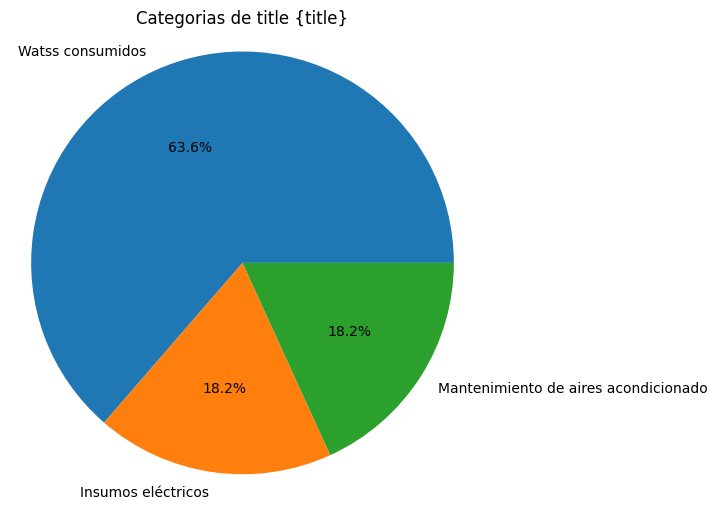

In [280]:
plt.figure(figsize=(6, 6))  # Opcional: ajusta el tamaño de la figura

plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=0)
# labels: Etiquetas para cada categoría.
# autopct: Formato de las etiquetas mostrando el porcentaje.
# startangle: Ángulo inicial de inicio del gráfico (opcional).

plt.axis('equal')  # Esto asegura que el gráfico de pastel sea un círculo.

plt.title(f'Categorias de title {{title}}')